In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn import linear_model
import scipy.stats as stats

In [2]:
df = pd.read_csv('baseballdatabank-master/core/Teams.csv')

In [3]:
features = ['R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','IPouts','HA','HRA','BBA','SOA','E','DP','FP']

In [4]:
df.head()
df = df[df.yearID>1990]
df = df[(df.yearID != 1994) & (df.yearID != 1995)]
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2073,1991,NL,ATL,ATL,W,1,162,81.0,94,68,...,122,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,2140217.0,106,106,ATL,ATL,ATL
2074,1991,AL,BAL,BAL,E,6,162,81.0,67,95,...,172,0.985,Baltimore Orioles,Memorial Stadium,2552753.0,96,97,BAL,BAL,BAL
2075,1991,AL,BOS,BOS,E,2,162,81.0,84,78,...,165,0.981,Boston Red Sox,Fenway Park II,2562435.0,105,105,BOS,BOS,BOS
2076,1991,AL,CAL,ANA,W,7,162,81.0,81,81,...,156,0.984,California Angels,Anaheim Stadium,2416236.0,99,100,CAL,CAL,CAL
2077,1991,AL,CHA,CHW,W,2,162,81.0,87,75,...,151,0.982,Chicago White Sox,Comiskey Park II,2934154.0,98,97,CHW,CHA,CHA


In [5]:
df_features = df[features]

In [6]:
df.DivWin = df.DivWin.replace({'Y':True , 'N': False})
df.WCWin = df.WCWin.replace({'Y':True , 'N': False})

In [7]:
df['playoffs'] = df.DivWin | df.WCWin

In [8]:
df['playoffs']

2073     True
2074    False
2075    False
2076    False
2077    False
        ...  
2920     True
2921     True
2922    False
2923    False
2924     True
Name: playoffs, Length: 796, dtype: bool

In [9]:
df_features.reset_index(inplace = True, drop = True)
df_features

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,749,5456,1407,255,30,141,563.0,906.0,165.0,76.0,...,18,7,4358,1304,118,481,969,138,122,0.978
1,686,5604,1421,256,29,170,528.0,974.0,50.0,33.0,...,8,8,4373,1534,147,504,868,91,172,0.985
2,731,5530,1486,305,25,126,593.0,820.0,59.0,39.0,...,15,13,4319,1405,147,530,999,116,165,0.981
3,653,5470,1396,245,29,115,448.0,928.0,94.0,56.0,...,18,10,4325,1351,141,543,990,102,156,0.984
4,758,5594,1464,226,39,139,610.0,896.0,134.0,74.0,...,28,8,4434,1302,154,601,923,116,151,0.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,764,5449,1336,246,24,210,561.0,1420.0,116.0,29.0,...,1,14,4332,1284,191,545,1399,66,168,0.989
792,769,5628,1427,291,29,217,542.0,1493.0,94.0,37.0,...,0,12,4423,1274,181,453,1621,87,126,0.985
793,810,5540,1374,296,24,223,534.0,1578.0,131.0,38.0,...,4,9,4314,1515,241,583,1379,105,143,0.982
794,726,5493,1299,270,21,247,509.0,1514.0,51.0,20.0,...,1,7,4321,1450,228,604,1332,96,141,0.984


In [10]:
df_features.isna().sum()

R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
CS        0
HBP       0
SF        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

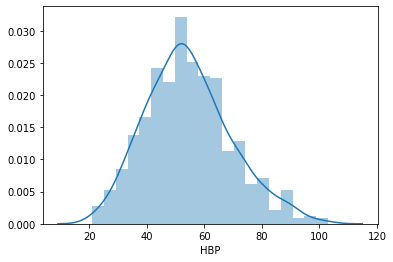

In [11]:
sns.distplot(df_features.HBP)

In [12]:
df_features.HBP.mode()

0    52.0
dtype: float64

In [13]:
df_features.HBP.median()

53.0

In [14]:
df_features.HBP.mean()

54.459798994974875

In [15]:
df_features.HBP.std()

14.867452678315

In [16]:
df_features.HBP= df_features.HBP.fillna(df_features.HBP.median())

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df_features.SF.mean()

45.017587939698494

In [18]:
df_features.SF.std()

8.987885191321853

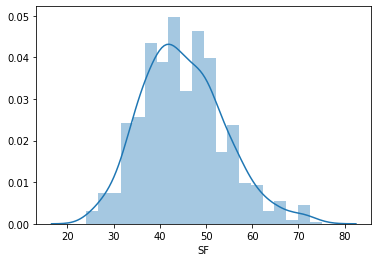

In [19]:
sns.distplot(df_features.SF)

In [20]:
df_features.SF = df_features.SF.fillna(round(df_features.SF.mean()))

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
df_target = df['W']

In [22]:
df_target

2073    94
2074    67
2075    84
2076    81
2077    87
        ..
2920    91
2921    96
2922    78
2923    67
2924    93
Name: W, Length: 796, dtype: int64

Text(0.5, 0, 'Wins')

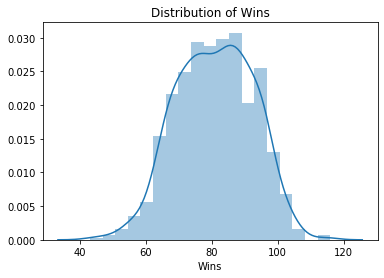

In [23]:
sns.distplot(df_target)
plt.title('Distribution of Wins')
plt.xlabel('Wins')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

In [28]:
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [29]:
lm = LinearRegression()

In [30]:
lm = lm.fit(X_train, y_train)

In [31]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       796 non-null    int64  
 1   AB      796 non-null    int64  
 2   H       796 non-null    int64  
 3   2B      796 non-null    int64  
 4   3B      796 non-null    int64  
 5   HR      796 non-null    int64  
 6   BB      796 non-null    float64
 7   SO      796 non-null    float64
 8   SB      796 non-null    float64
 9   CS      796 non-null    float64
 10  HBP     796 non-null    float64
 11  SF      796 non-null    float64
 12  RA      796 non-null    int64  
 13  ER      796 non-null    int64  
 14  ERA     796 non-null    float64
 15  CG      796 non-null    int64  
 16  SHO     796 non-null    int64  
 17  IPouts  796 non-null    int64  
 18  HA      796 non-null    int64  
 19  HRA     796 non-null    int64  
 20  BBA     796 non-null    int64  
 21  SOA     796 non-null    int64  
 22  E 

In [32]:
df_features

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,749,5456,1407,255,30,141,563.0,906.0,165.0,76.0,...,18,7,4358,1304,118,481,969,138,122,0.978
1,686,5604,1421,256,29,170,528.0,974.0,50.0,33.0,...,8,8,4373,1534,147,504,868,91,172,0.985
2,731,5530,1486,305,25,126,593.0,820.0,59.0,39.0,...,15,13,4319,1405,147,530,999,116,165,0.981
3,653,5470,1396,245,29,115,448.0,928.0,94.0,56.0,...,18,10,4325,1351,141,543,990,102,156,0.984
4,758,5594,1464,226,39,139,610.0,896.0,134.0,74.0,...,28,8,4434,1302,154,601,923,116,151,0.982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,764,5449,1336,246,24,210,561.0,1420.0,116.0,29.0,...,1,14,4332,1284,191,545,1399,66,168,0.989
792,769,5628,1427,291,29,217,542.0,1493.0,94.0,37.0,...,0,12,4423,1274,181,453,1621,87,126,0.985
793,810,5540,1374,296,24,223,534.0,1578.0,131.0,38.0,...,4,9,4314,1515,241,583,1379,105,143,0.982
794,726,5493,1299,270,21,247,509.0,1514.0,51.0,20.0,...,1,7,4321,1450,228,604,1332,96,141,0.984


In [33]:
df_features.isna().sum()

R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
CS        0
HBP       0
SF        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

In [34]:
#y_train_pred = lm_2.predict(X_train)

#train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


#print('Training Root Mean Squared Error:' , train_rmse)

In [35]:
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3.4404188940937663


In [36]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3.532079019779347
Training:  3 vs. Testing:  3


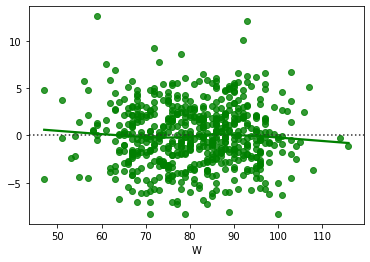

In [37]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

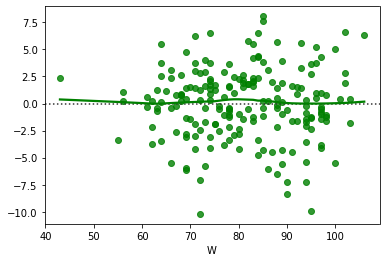

In [38]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

In [39]:
lm.coef_

array([  7.63069549,  -4.94967913,   4.40227252,  -0.26800881,
        -0.3300167 ,   0.69625593,  -0.50162655,  -0.16731393,
         0.43094416,  -0.9507639 ,  -0.07944327,  -0.5226464 ,
        -4.44008018, -24.192086  ,  24.06802691,  -0.26787534,
         0.87276502,   4.96068459,  -0.38138736,  -0.52449293,
        -0.62943889,  -0.36416495,  -2.83434964,  -0.22403789,
        -2.42842393])

In [40]:
X_train.columns


Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF',
       'RA', 'ER', 'ERA', 'CG', 'SHO', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA',
       'E', 'DP', 'FP'],
      dtype='object')

In [41]:
#Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP,FP
R,NaN,0.622941,0.793593,0.586963,0.012114,0.676269,0.613679,0.186743,0.031556,0.058125,...,0.068707,0.157863,0.051943,0.227174,0.275486,0.121810,0.062221,0.047618,0.147515,0.053770
AB,NaN,NaN,0.810072,0.545440,0.051691,0.333747,0.138026,0.181648,0.094244,0.185696,...,0.054087,0.217743,0.301383,0.354553,0.256456,0.148746,0.073663,0.069562,0.199667,0.088951
H,NaN,NaN,NaN,0.605430,0.134703,0.301505,0.283152,0.475324,0.057838,0.038313,...,0.116063,0.188186,0.035951,0.342519,0.130877,0.126641,0.246209,0.000291,0.236690,0.018430
2B,NaN,NaN,NaN,NaN,0.053975,0.307713,0.258392,0.089656,0.130116,0.231986,...,0.096215,0.098356,0.019058,0.189192,0.159283,0.054146,0.019609,0.111058,0.124439,0.113138
3B,NaN,NaN,NaN,NaN,NaN,0.260462,0.112610,0.098857,0.224380,0.207221,...,0.073633,0.026973,0.072997,0.041898,0.083445,0.060383,0.135819,0.102752,0.004196,0.096368
HR,NaN,NaN,NaN,NaN,NaN,NaN,0.366490,0.316630,0.239054,0.337392,...,0.215584,0.125571,0.015456,0.077586,0.488695,0.059080,0.302119,0.172867,0.013484,0.154458
BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087733,0.061546,0.022355,...,0.180971,0.021910,0.169286,0.026531,0.001692,0.110182,0.069355,0.025710,0.026137,0.012153
SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221988,0.388646,...,0.518825,0.022009,0.020803,0.162004,0.322937,0.059939,0.598643,0.215609,0.182604,0.178341
SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671209,...,0.244720,0.024718,0.037265,0.027680,0.143895,0.047085,0.211543,0.191558,0.066546,0.184657
CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.449024,0.108325,0.008547,0.076571,0.211417,0.111366,0.406328,0.380117,0.043030,0.353499


In [42]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)
to_drop
#X_train.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)
#X_test.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)

['ER', 'ERA', 'FP']

In [43]:
f = "W~R+AB+H+HR+BB+SO+SB+CS+HBP+SF+RA+CG+SHO+IPouts+HA+HRA+BBA+SOA+E+DP"
df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro', 'playoffs'],
      dtype='object')

In [44]:
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     389.5
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:57:53   Log-Likelihood:                -2124.6
No. Observations:                 796   AIC:                             4291.
Df Residuals:                     775   BIC:                             4389.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2579     16.577      0.498      0.619     -24.284      40.800
R              0.0849      0.006     15.156      0.000       0.074       0.096
AB            -0.0632      0.005    -12.148      0.000      -0.073      -0.053
H              0.0506      0.006      8.645      0.000       0.039       0.062
HR             0.0239      0.007      3.373      0.001       0.010       0.038
BB            -0.0072      0.003     -2.491      0.013      -0.013      -0.002
SO            -0.0008      0.001     -0.602      0.547      -0.004       0.002
SB             0.0087      0.005      1.639      0.102      -0.002       0.019
CS            -0.0537      0.015     -3.557      0.000      -0.083      -0.024
HBP           -0.0031      0.009     -0.325      0.745      -0.022       0.015
SF            -0.0440      0.019     -2.349      0.019      -0.081      -0.007
RA            -0.0599      0.006    -10.077      0.000      -0.072      -0.048
CG            -0.0358      0.033     -1.076      0.282      -0.101       0.030
SHO            0.1893      0.046      4.129      0.000       0.099       0.279
IPouts         0.0807      0.006     12.659      0.000       0.068       0.093
HA            -0.0034      0.004     -0.855      0.393      -0.011       0.004
HRA           -0.0164      0.008     -2.106      0.036      -0.032      -0.001
BBA           -0.0089      0.003     -2.945      0.003      -0.015      -0.003
SOA           -0.0001      0.001     -0.096      0.923      -0.003       0.003
E             -0.0164      0.009     -1.909      0.057      -0.033       0.000
DP            -0.0123      0.008     -1.445      0.149      -0.029       0.004
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.395
Skew:                          -0.029   Prob(JB):                        0.498
Kurtosis:                       3.197   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

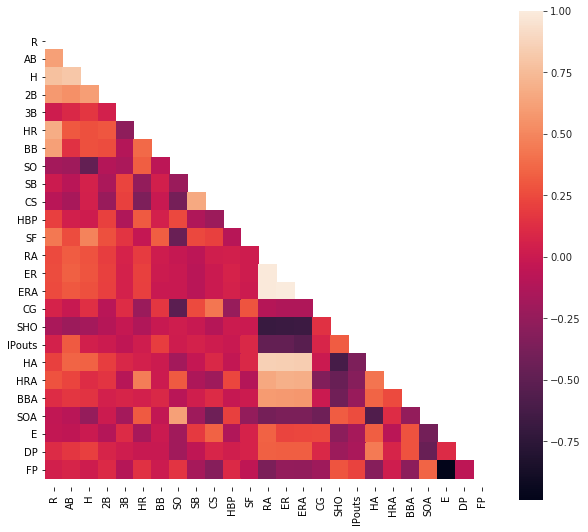

In [45]:
#Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df_features.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df_features.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [46]:
#Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,RA,CG,SHO,IPouts,HA,HRA,BBA,SOA,E,DP
R,NaN,0.622941,0.793593,0.586963,0.012114,0.676269,0.613679,0.186743,0.031556,0.058125,...,0.258761,0.068707,0.157863,0.051943,0.227174,0.275486,0.121810,0.062221,0.047618,0.147515
AB,NaN,NaN,0.810072,0.545440,0.051691,0.333747,0.138026,0.181648,0.094244,0.185696,...,0.337977,0.054087,0.217743,0.301383,0.354553,0.256456,0.148746,0.073663,0.069562,0.199667
H,NaN,NaN,NaN,0.605430,0.134703,0.301505,0.283152,0.475324,0.057838,0.038313,...,0.282184,0.116063,0.188186,0.035951,0.342519,0.130877,0.126641,0.246209,0.000291,0.236690
2B,NaN,NaN,NaN,NaN,0.053975,0.307713,0.258392,0.089656,0.130116,0.231986,...,0.191227,0.096215,0.098356,0.019058,0.189192,0.159283,0.054146,0.019609,0.111058,0.124439
3B,NaN,NaN,NaN,NaN,NaN,0.260462,0.112610,0.098857,0.224380,0.207221,...,0.038623,0.073633,0.026973,0.072997,0.041898,0.083445,0.060383,0.135819,0.102752,0.004196
HR,NaN,NaN,NaN,NaN,NaN,NaN,0.366490,0.316630,0.239054,0.337392,...,0.218397,0.215584,0.125571,0.015456,0.077586,0.488695,0.059080,0.302119,0.172867,0.013484
BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087733,0.061546,0.022355,...,0.037017,0.180971,0.021910,0.169286,0.026531,0.001692,0.110182,0.069355,0.025710,0.026137
SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221988,0.388646,...,0.006889,0.518825,0.022009,0.020803,0.162004,0.322937,0.059939,0.598643,0.215609,0.182604
SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671209,...,0.061997,0.244720,0.024718,0.037265,0.027680,0.143895,0.047085,0.211543,0.191558,0.066546
CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.021648,0.449024,0.108325,0.008547,0.076571,0.211417,0.111366,0.406328,0.380117,0.043030


In [47]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

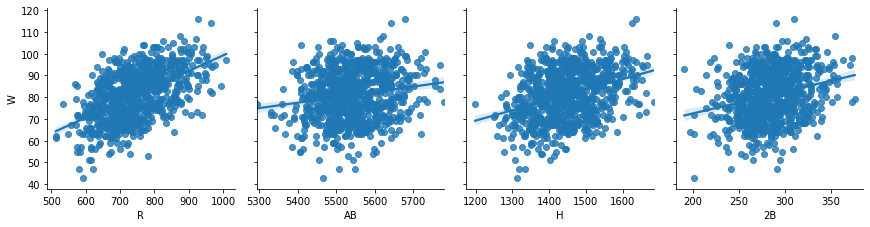

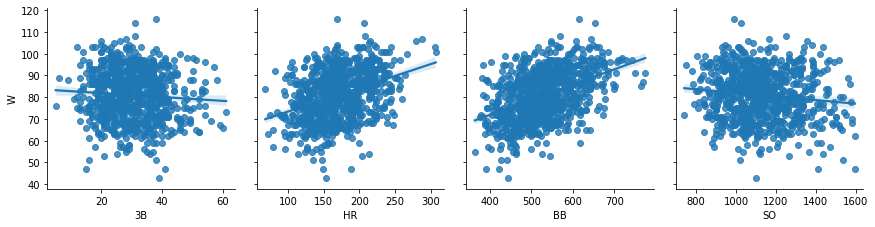

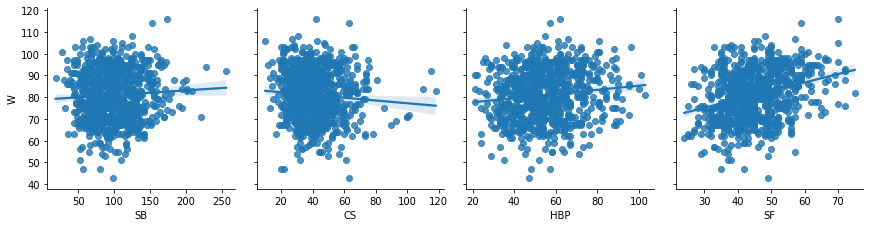

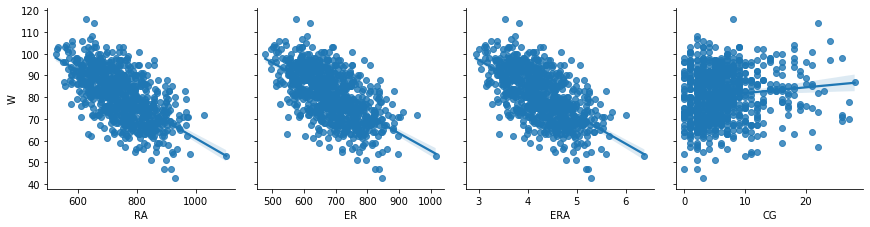

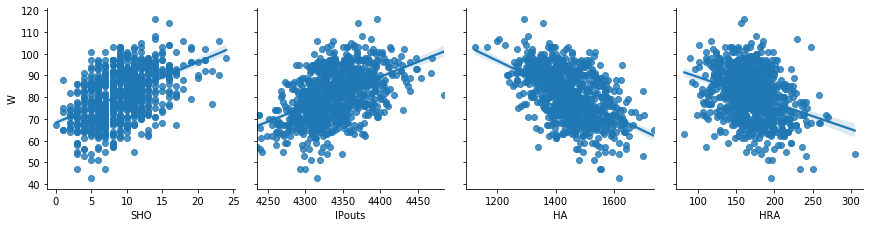

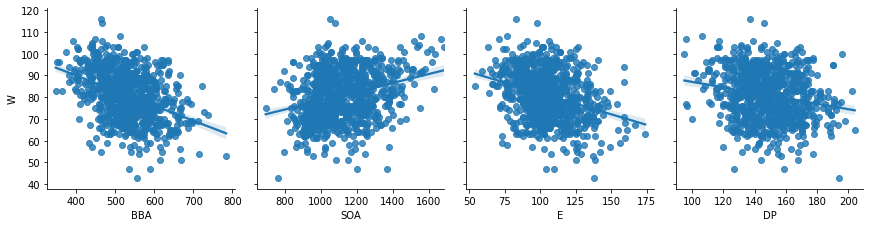

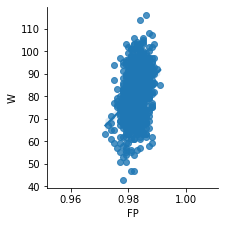

In [48]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['W'],x_vars=i, kind="reg", height=3)

Text(27.125, 0.5, 'Wins')

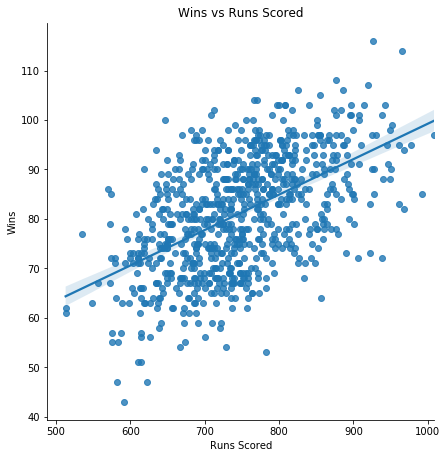

In [49]:
sns.pairplot(data = df, y_vars = 'W', x_vars = 'R', kind = 'reg',height = 6 )
plt.title('Wins vs Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Wins')

Text(27.125, 0.5, 'Wins')

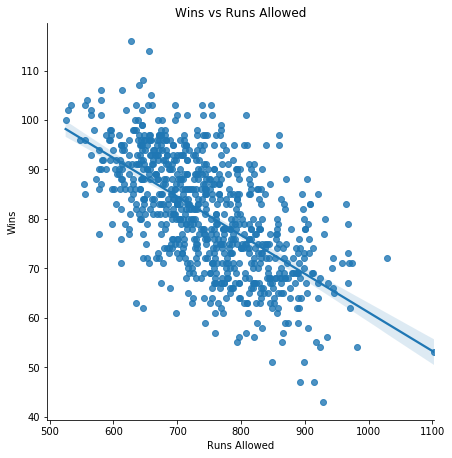

In [50]:
sns.pairplot(data = df, y_vars = 'W', x_vars = 'RA', kind = 'reg',height = 6 )
plt.title('Wins vs Runs Allowed')
plt.xlabel('Runs Allowed')
plt.ylabel('Wins')

In [51]:
df[df['yearID']==1994]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,playoffs


In [52]:
df[df['G']<162]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,playoffs
2078,1991,NL,CHN,CHC,E,4,160,83.0,77,83,...,0.982,Chicago Cubs,Wrigley Field,2314250.0,104,105,CHC,CHN,CHN,False
2087,1991,NL,MON,WSN,E,6,161,68.0,71,90,...,0.979,Montreal Expos,Stade Olympique,934742.0,99,99,MON,MON,MON,False
2089,1991,NL,NYN,NYM,E,5,161,82.0,77,84,...,0.977,New York Mets,Shea Stadium,2284484.0,99,99,NYM,NYN,NYN,False
2212,1996,AL,CAL,ANA,W,4,161,81.0,70,91,...,0.979,California Angels,Anaheim Stadium,1820521.0,98,98,CAL,CAL,CAL,False
2216,1996,AL,CLE,CLE,C,1,161,80.0,99,62,...,0.980,Cleveland Indians,Jacobs Field,3318174.0,99,98,CLE,CLE,CLE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,2016,NL,MIA,FLA,E,3,161,80.0,79,82,...,0.985,Miami Marlins,Marlins Park,1712417.0,93,93,MIA,FLO,MIA,False
2879,2018,NL,MIA,FLA,E,5,161,81.0,63,98,...,0.986,Miami Marlins,Marlins Park,811104.0,89,90,MIA,FLO,MIA,False
2886,2018,NL,PIT,PIT,C,4,161,80.0,82,79,...,0.982,Pittsburgh Pirates,PNC Park,1465316.0,96,96,PIT,PIT,PIT,False
2899,2019,AL,CHA,CHW,C,3,161,80.0,72,89,...,0.980,Chicago White Sox,Guaranteed Rate Field,1649775.0,97,99,CHW,CHA,CHA,False


In [53]:
pd.set_option('display.max_rows', 300)

In [54]:
df[df['AB']<4500]

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,playoffs


In [55]:
df_features['run_diff'] = df_features['R'] - df_features['RA']
df['run_diff'] = df['R'] - df['RA']

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

In [60]:
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3.460617026224069


In [61]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3.4997552220245716
Training:  3 vs. Testing:  3


In [62]:
lm.coef_

array([ 9.35678369e+12, -4.89909539e+00,  4.05620587e+00, -2.39984188e-01,
       -1.64915267e-01,  9.23469198e-01, -6.34641622e-01, -2.24860724e-01,
        2.37237579e-01, -8.06463605e-01,  3.31775421e-02, -2.60083697e-01,
       -9.62375136e+12, -3.24580795e+01,  3.24926977e+01, -2.30783619e-01,
        8.51183248e-01,  5.52154636e+00, -1.67592782e-01, -7.10541632e-01,
       -4.56123602e-01, -8.15379886e-02, -2.09949013e+00, -2.40914521e-01,
       -1.61630386e+00, -1.13371403e+13])

In [63]:
f = "W~R+H+HR+BB+SO+SB+CS+HBP+SF+RA+CG+SHO+HA+HRA+BBA+SOA+E+DP+run_diff"

In [64]:
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     346.9
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:08   Log-Likelihood:                -2204.8
No. Observations:                 796   AIC:                             4448.
Df Residuals:                     777   BIC:                             4536.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.2146      6.638     10.728      0.000      58.183      84.246
R              0.0239      0.004      5.408      0.000       0.015       0.033
H              0.0023      0.004      0.539      0.590      -0.006       0.011
HR             0.0316      0.008      4.069      0.000       0.016       0.047
BB             0.0051      0.003      1.693      0.091      -0.001       0.011
SO            -0.0045      0.001     -3.068      0.002      -0.007      -0.002
SB             0.0024      0.006      0.413      0.679      -0.009       0.014
CS             0.0327      0.015      2.188      0.029       0.003       0.062
HBP            0.0109      0.010      1.051      0.294      -0.009       0.031
SF             0.0065      0.020      0.323      0.747      -0.033       0.046
RA            -0.0352      0.004     -8.249      0.000      -0.044      -0.027
CG            -0.0772      0.036     -2.122      0.034      -0.149      -0.006
SHO            0.2211      0.051      4.375      0.000       0.122       0.320
HA             0.0074      0.004      1.765      0.078      -0.001       0.016
HRA           -0.0120      0.009     -1.395      0.163      -0.029       0.005
BBA           -0.0032      0.003     -0.976      0.329      -0.010       0.003
SOA            0.0029      0.002      1.800      0.072      -0.000       0.006
E             -0.0076      0.009     -0.809      0.419      -0.026       0.011
DP            -0.0107      0.009     -1.143      0.253      -0.029       0.008
run_diff       0.0591      0.003     20.475      0.000       0.053       0.065
==============================================================================
Omnibus:                        2.227   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.263
Skew:                           0.032   Prob(JB):                        0.323
Kurtosis:                       3.253   Cond. No.                     1.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.3e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
df_features['avg'] = df_features['H']/df_features['AB']
df['avg'] = df['H']/df['AB']
df_features['OBP'] = (df_features['H']+df_features['BB']+df_features['HBP'])/(df_features['AB']+df_features['BB']+df_features['HBP']+df_features['SF'])
df['OBP'] = (df['H']+df['BB']+df['HBP'])/(df['AB']+df['BB']+df['HBP']+df['SF'])
df['1B'] = df['H']-df['HR']-df['3B']-df['2B']
df_features['1B'] = df_features['H']-df_features['HR']-df_features['3B']-df_features['2B']
df['SLG'] = (df['1B']+2*df['2B']+3*df['3B']+4*df['HR'])/df['AB']
df_features['SLG'] = (df_features['1B']+2*df_features['2B']+3*df_features['3B']+4*df_features['HR'])/df_features['AB']
df['OPS'] = df['OBP'] + df['SLG']
df_features['OPS'] = df_features['OBP'] + df_features['SLG']
df_features.isna().sum()


/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value i

R           0
AB          0
H           0
2B          0
3B          0
HR          0
BB          0
SO          0
SB          0
CS          0
HBP         0
SF          0
RA          0
ER          0
ERA         0
CG          0
SHO         0
IPouts      0
HA          0
HRA         0
BBA         0
SOA         0
E           0
DP          0
FP          0
run_diff    0
avg         0
OBP         0
1B          0
SLG         0
OPS         0
dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training Root Mean Squared Error: 3.380490962086918
Testing Root Mean Squared Error: 3.705067929826668
Training:  3 vs. Testing:  3


In [67]:
f = "W~R+H+HR+BB+SO+SB+CS+HBP+SF+RA+CG+SHO+HA+HRA+BBA+SOA+E+DP+run_diff+avg+OBP+SLG+OPS"
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     304.5
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:08   Log-Likelihood:                -2195.0
No. Observations:                 796   AIC:                             4434.
Df Residuals:                     774   BIC:                             4537.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.7699     19.194      1.812      0.070      -2.908      72.448
R              0.0252      0.005      5.497      0.000       0.016       0.034
H             -0.0169      0.024     -0.705      0.481      -0.064       0.030
HR             0.0679      0.016      4.363      0.000       0.037       0.098
BB            -0.0526      0.055     -0.953      0.341      -0.161       0.056
SO            -0.0025      0.002     -1.637      0.102      -0.006       0.001
SB             0.0030      0.006      0.523      0.601      -0.008       0.014
CS             0.0168      0.015      1.103      0.270      -0.013       0.047
HBP           -0.0451      0.056     -0.806      0.421      -0.155       0.065
SF             0.0300      0.034      0.880      0.379      -0.037       0.097
RA            -0.0343      0.004     -7.890      0.000      -0.043      -0.026
CG            -0.0607      0.036     -1.671      0.095      -0.132       0.011
SHO            0.2111      0.050      4.212      0.000       0.113       0.310
HA             0.0086      0.004      2.054      0.040       0.000       0.017
HRA           -0.0139      0.009     -1.634      0.103      -0.031       0.003
BBA           -0.0025      0.003     -0.771      0.441      -0.009       0.004
SOA            0.0031      0.002      1.989      0.047    4.11e-05       0.006
E             -0.0095      0.009     -1.013      0.311      -0.028       0.009
DP            -0.0138      0.009     -1.484      0.138      -0.032       0.004
run_diff       0.0595      0.003     20.631      0.000       0.054       0.065
avg         -203.9911    578.127     -0.353      0.724   -1338.873     930.891
OBP          373.4158    340.836      1.096      0.274    -295.657    1042.488
SLG         -225.6274    173.124     -1.303      0.193    -565.475     114.221
OPS          147.7884    169.006      0.874      0.382    -183.977     479.554
==============================================================================
Omnibus:                        2.186   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.235
Skew:                           0.019   Prob(JB):                        0.327
Kurtosis:                       3.257   Cond. No.                     2.29e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,R,AB,H,2B,3B,HR,BB,SO,SB,CS,...,SOA,E,DP,FP,run_diff,avg,OBP,1B,SLG,OPS
R,NaN,0.613301,0.779724,0.572282,0.037097,0.668942,0.605150,0.203933,0.037302,0.059223,...,0.061849,0.033378,0.072474,0.035077,0.602225,0.772938,0.872970,0.331309,0.898065,0.951471
AB,NaN,NaN,0.811317,0.534442,0.065054,0.294961,0.145105,0.230196,0.069204,0.153601,...,0.094420,0.062898,0.138650,0.084622,0.235941,0.697144,0.533053,0.573525,0.559743,0.588904
H,NaN,NaN,NaN,0.603419,0.117763,0.262111,0.278364,0.501716,0.075626,0.062912,...,0.248647,0.018133,0.172479,0.033327,0.407483,0.984621,0.822432,0.779564,0.696020,0.791873
2B,NaN,NaN,NaN,NaN,0.004823,0.275906,0.237523,0.119404,0.143579,0.218002,...,0.001950,0.107960,0.064697,0.111768,0.294673,0.580834,0.541690,0.156398,0.609619,0.626869
3B,NaN,NaN,NaN,NaN,NaN,0.308491,0.141391,0.118709,0.217485,0.228257,...,0.153048,0.101945,0.021518,0.093515,0.066687,0.125788,0.004922,0.178258,0.063330,0.045949
HR,NaN,NaN,NaN,NaN,NaN,NaN,0.356539,0.312524,0.241001,0.347238,...,0.290708,0.128822,0.010610,0.109189,0.377753,0.233363,0.381987,0.304744,0.844811,0.731055
BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099134,0.074054,0.023132,...,0.057456,0.005836,0.028590,0.006432,0.468240,0.297734,0.742322,0.057198,0.415176,0.566347
SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229781,0.397410,...,0.603179,0.155426,0.179875,0.116886,0.141921,0.547515,0.409505,0.698436,0.025805,0.170875
SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663554,...,0.203015,0.160133,0.072536,0.146369,0.100188,0.112752,0.103644,0.250788,0.126950,0.049725
CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.446114,0.301308,0.071760,0.270884,0.054895,0.123066,0.080679,0.322161,0.208175,0.114874


In [69]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)
to_drop
#X_train.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)
#X_test.drop(columns = ['ER', 'ERA', 'FP'], inplace = True)

['ER', 'ERA', 'FP', 'avg', 'OPS']

In [70]:
lasso = Lasso(alpha=.02, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 2.73630733976573
Testing Error: 3.693928538088952


/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.76129314229638, tolerance: 8.026753098827474
  positive)


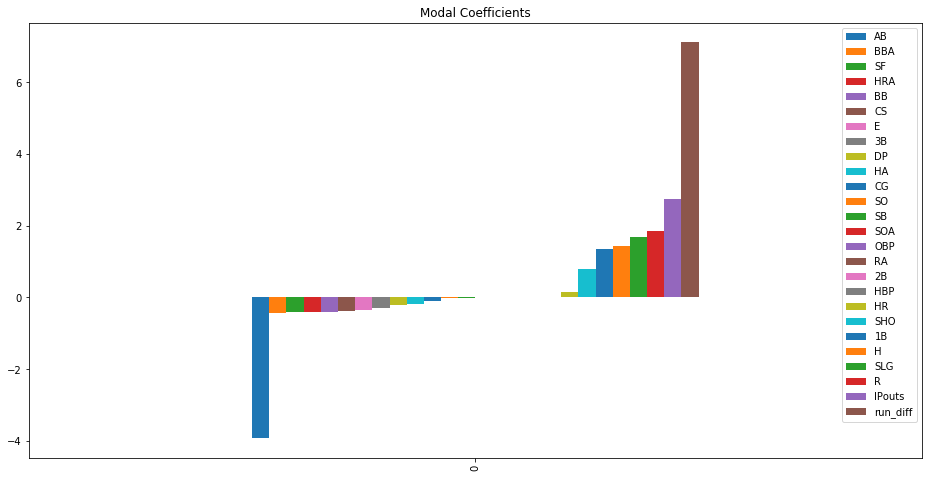

In [71]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8))

In [72]:
lasso_coef01.T

,0
AB,-3.912409
BBA,-0.425837
SF,-0.410851
HRA,-0.397102
BB,-0.397045
CS,-0.389684
E,-0.336534
3B,-0.287850
DP,-0.207323
HA,-0.170979


In [73]:
ols_1 = linear_model.LinearRegression()

In [74]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols_1, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [75]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [76]:
list(removed_rfe)

['SO', 'SB', 'SF', 'CG', 'SOA', 'E', 'DP']

In [77]:
len(list(selected_rfe))

19

In [78]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 3.4401552390438495
Testing Root Mean Squared Error: 3.701408170664103
Original:  3.693928538088952 vs. RFE:  3.701408170664103


In [79]:
selected_rfe

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'CS', 'HBP', 'RA', 'SHO',
       'IPouts', 'HA', 'HRA', 'BBA', 'run_diff', 'OBP', '1B', 'SLG'],
      dtype='object')

In [80]:
df_features['FIP'] = (13*df_features.HR + 3* df_features.BB - 2 * df_features.SO)/(df_features.IPouts/3)
df['FIP'] = (13*df.HR + 3* df.BB - 2 * df.SO)/(df.IPouts/3)

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training Root Mean Squared Error: 3.3878199333092294
Testing Root Mean Squared Error: 3.6941948097679114
Training:  3 vs. Testing:  3


In [82]:
f = "W~R+AB+H+HR+BB+SO+SB+CS+HBP+SF+RA+CG+SHO+IPouts+HA+HRA+BBA+SOA+E+DP+run_diff+avg+OBP+SLG+OPS+FIP"
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     327.5
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:                -2119.5
No. Observations:                 796   AIC:                             4289.
Df Residuals:                     771   BIC:                             4406.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -244.1657    171.082     -1.427      0.154    -580.007      91.675
R              0.0400      0.004      9.191      0.000       0.031       0.049
AB            -0.0223      0.032     -0.704      0.481      -0.085       0.040
H             -0.0928      0.121     -0.770      0.441      -0.329       0.144
HR            -0.0760      0.296     -0.257      0.797      -0.656       0.504
BB            -0.0861      0.078     -1.097      0.273      -0.240       0.068
SO             0.0206      0.045      0.455      0.649      -0.068       0.109
SB             0.0085      0.005      1.620      0.106      -0.002       0.019
CS            -0.0573      0.015     -3.789      0.000      -0.087      -0.028
HBP           -0.0488      0.052     -0.945      0.345      -0.150       0.053
SF            -0.0189      0.032     -0.601      0.548      -0.081       0.043
RA            -0.0092      0.004     -2.072      0.039      -0.018      -0.000
CG            -0.0370      0.033     -1.113      0.266      -0.102       0.028
SHO            0.1891      0.046      4.124      0.000       0.099       0.279
IPouts         0.0834      0.010      8.207      0.000       0.063       0.103
HA            -0.0039      0.004     -0.985      0.325      -0.012       0.004
HRA           -0.0193      0.008     -2.457      0.014      -0.035      -0.004
BBA           -0.0092      0.003     -3.048      0.002      -0.015      -0.003
SOA           -0.0001      0.001     -0.094      0.925      -0.003       0.003
E             -0.0177      0.009     -2.064      0.039      -0.035      -0.001
DP            -0.0141      0.008     -1.657      0.098      -0.031       0.003
run_diff       0.0492      0.003     17.888      0.000       0.044       0.055
avg          490.3368    839.429      0.584      0.559   -1157.501    2138.175
OBP          314.8770    314.254      1.002      0.317    -302.019     931.772
SLG         -195.3840    159.689     -1.224      0.222    -508.862     118.094
OPS          119.4929    155.739      0.767      0.443    -186.230     425.216
FIP           14.8747     32.761      0.454      0.650     -49.437      79.187
==============================================================================
Omnibus:                        1.499   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.395
Skew:                          -0.031   Prob(JB):                        0.498
Kurtosis:                       3.195   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.61e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [83]:
df.groupby('playoffs').R.mean()

playoffs
False    724.309028
True     799.790909
Name: R, dtype: float64

In [84]:
df.groupby('playoffs').RA.mean()

playoffs
False    769.496528
True     681.481818
Name: RA, dtype: float64

In [85]:
df.groupby('playoffs').R.mean()

playoffs
False    724.309028
True     799.790909
Name: R, dtype: float64

In [86]:
df.groupby(['lgID', 'playoffs']).W.mean()

lgID  playoffs
AL    False       75.850909
      True        94.954545
NL    False       75.820598
      True        93.845455
Name: W, dtype: float64

In [87]:
stats.ttest_ind(df[df.lgID == 'AL'].R, df[df.lgID == 'NL'].R)

Ttest_indResult(statistic=7.083301547335065, pvalue=3.104902918924408e-12)

In [88]:
f = "R~H+HR+BB+SO+SB+CS+HBP+SF+avg+OBP+SLG+OPS"
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1009.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:                -3596.0
No. Observations:                 796   AIC:                             7216.
Df Residuals:                     784   BIC:                             7272.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -442.2650    105.433     -4.195      0.000    -649.230    -235.300
H              0.3601      0.137      2.634      0.009       0.092       0.628
HR             0.3288      0.088      3.756      0.000       0.157       0.501
BB             0.5299      0.316      1.678      0.094      -0.090       1.150
SO            -0.0057      0.007     -0.767      0.443      -0.020       0.009
SB             0.1633      0.032      5.105      0.000       0.101       0.226
CS            -0.0086      0.081     -0.107      0.915      -0.168       0.151
HBP            0.5079      0.321      1.580      0.114      -0.123       1.139
SF             0.6551      0.194      3.378      0.001       0.274       1.036
avg         1559.1707   3322.623      0.469      0.639   -4963.120    8081.462
OBP        -1739.7068   1953.785     -0.890      0.374   -5574.975    2095.561
SLG         1487.7114    990.558      1.502      0.134    -456.748    3432.171
OPS         -251.9954    970.151     -0.260      0.795   -2156.396    1652.405
==============================================================================
Omnibus:                        0.947   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.623   Jarque-Bera (JB):                0.799
Skew:                           0.031   Prob(JB):                        0.671
Kurtosis:                       3.142   Cond. No.                     8.42e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [89]:
f = "RA~CG+SHO+IPouts+HA+HRA+BBA+SOA+E+DP+ERA+FIP"
mlr_model = ols(formula=f, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RA   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     7169.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:58:10   Log-Likelihood:                -2884.9
No. Observations:                 796   AIC:                             5794.
Df Residuals:                     784   BIC:                             5850.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -613.9724     45.642    -13.452      0.000    -703.568    -524.377
CG             0.0646      0.079      0.816      0.414      -0.091       0.220
SHO           -0.2697      0.117     -2.310      0.021      -0.499      -0.041
IPouts         0.1264      0.011     11.655      0.000       0.105       0.148
HA             0.0434      0.010      4.307      0.000       0.024       0.063
HRA            0.0314      0.020      1.584      0.114      -0.008       0.070
BBA            0.0154      0.008      1.974      0.049    8.94e-05       0.031
SOA            0.0103      0.003      3.188      0.001       0.004       0.017
E              0.5738      0.021     27.568      0.000       0.533       0.615
DP             0.0230      0.021      1.076      0.282      -0.019       0.065
ERA          155.0757      2.404     64.520      0.000     150.358     159.794
FIP            1.0581      0.808      1.310      0.191      -0.528       2.644
==============================================================================
Omnibus:                        2.781   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.615
Skew:                           0.128   Prob(JB):                        0.271
Kurtosis:                       3.114   Cond. No.                     6.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
df['FIP']

2073    1.177145
2074    1.266408
2075    1.234313
2076    0.681850
2077    1.248309
          ...   
2920    1.089335
2921    0.990956
2922    0.935327
2923    1.187225
2924    1.486105
Name: FIP, Length: 796, dtype: float64

In [91]:
stats.ttest_ind(df[((df.lgID == 'AL') & (df.playoffs))].W, df[((df.lgID == 'NL') & (df.playoffs))].W)

Ttest_indResult(statistic=1.5863005960606407, pvalue=0.11412055685951612)